In [ ]:
# install some new libraries
# pip install mplcursors
# pip install mpl_toolkits

In [1]:
# I played around with a number of new libraries not covered in class
# but didn't end up using all of them

# import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# confirm dtypes of csv file
asteroids = "neo.csv"
df = pd.read_csv(asteroids)
df.dtypes

Asteroid ID                                     int64
Name                                           object
Est diameter (km)                             float64
Potentially hazardous?                           bool
Closest approach date                          object
Approach velocity (kps)                       float64
How much did the asteroid miss us by? (km)    float64
For more info on this asteroid:                object
dtype: object

In [3]:
# read in csv file
csv_file = "neo.csv"
df = pd.read_csv(csv_file)

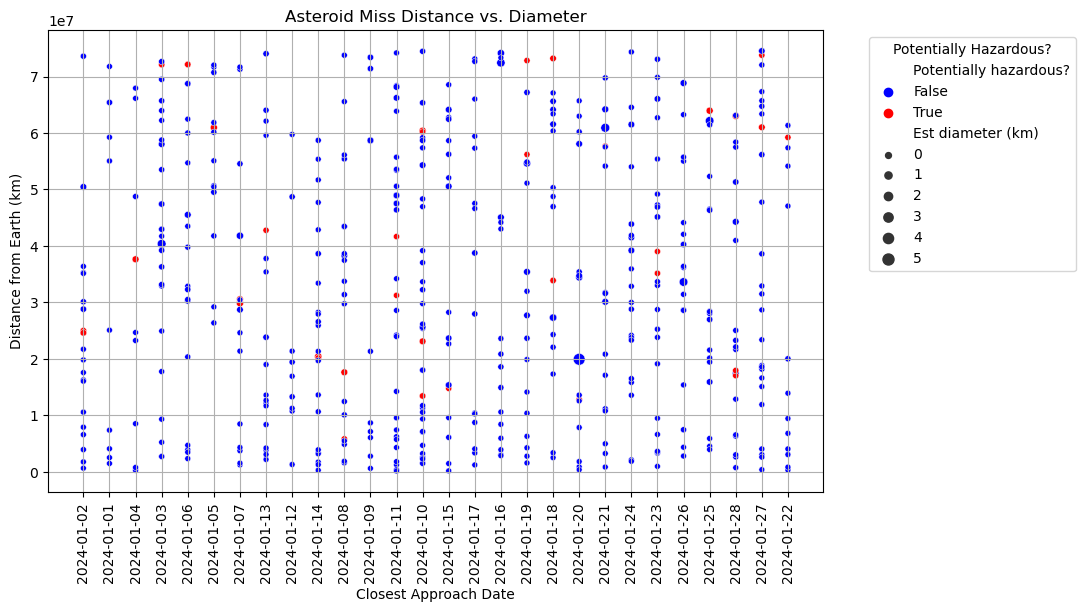

In [4]:
# Create a scatter plot with tooltips
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='Closest approach date',
    y='How much did the asteroid miss us by? (km)',
    hue='Potentially hazardous?',
    size='Est diameter (km)',
    data=df,
    palette={False: 'blue', True: 'red'},
    legend='brief',
)

# Add tooltips (hover data) using mplcursors
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"{sel.target[2]} ({sel.target[3]})"))

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.xlabel('Closest Approach Date')
plt.ylabel('Distance from Earth (km)')
plt.title('Asteroid Miss Distance vs. Diameter')

# Move the legend outside to the right
plt.legend(title='Potentially Hazardous?', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as an image (adjust the filename as needed)
plt.savefig("asteroid_heatmap.png", dpi=300, bbox_inches='tight')

plt.grid(True)
plt.show()

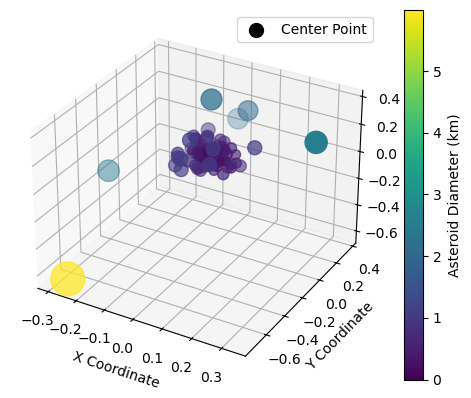

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate random points on a sphere
def generate_random_points(num_points):
    vec = np.random.randn(3, num_points)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

# Scale points according to relative distances from a center point
distances = df['Est diameter (km)'].values
def scale_points(points, distances):
    max_distance = max(distances)
    # Normalize the distances so they range from 0 to 1
    normalized_distances = distances / max_distance
    # Scale points based on normalized distances
    scaled_points = points * normalized_distances
    return scaled_points.T  # Transpose the result for correct unpacking

num_points = len(distances)
random_points = generate_random_points(num_points)
scaled_points = scale_points(random_points, distances)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the center point
ax.scatter(0, 0, 0, color='k', s=100, label='Center Point', marker='o')  # Black color for the center point

# Plot the data points with sizes and colors representing the asteroid size
sizes = distances * 100  # Scale the sizes for better visibility
scatter = ax.scatter(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], c=distances, s=sizes, cmap='viridis', marker='o')

# Create a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Asteroid Diameter (km)')

# Set the labels for the axes
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

# Add a legend
ax.legend()

plt.show()

# Save the plot as an image (adjust the filename as needed)
plt.savefig("asteroid_3d.png", dpi=300, bbox_inches='tight')


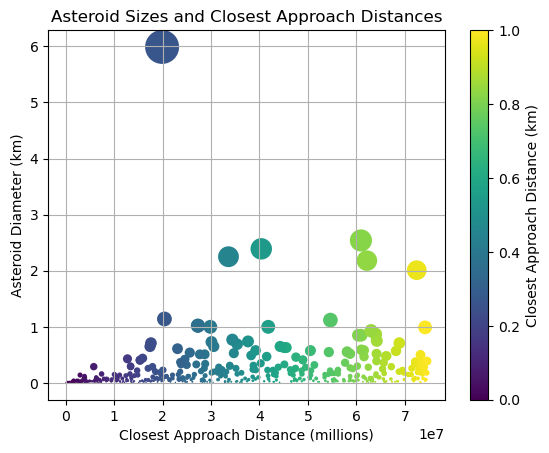

<Figure size 640x480 with 0 Axes>

In [11]:
# Assuming 'distances' is a NumPy array with the closest approach distances
# and 'sizes' is a NumPy array with the asteroid sizes
distances = np.array(df['How much did the asteroid miss us by? (km)'])
sizes = np.array(df['Est diameter (km)'])

# Normalize the sizes for the marker sizes
marker_sizes = sizes * 100  # Adjust this factor as needed for visibility

# Normalize the distances to use as indices for the colormap
norm = plt.Normalize(distances.min(), distances.max())
cmap = plt.get_cmap('viridis')

# Apply the colormap to the normalized distances to get actual colors
colors = cmap(norm(distances))

# Plotting
fig, ax = plt.subplots()
scatter = ax.scatter(distances, sizes, s=marker_sizes, c=colors, edgecolors='none', marker='o')

# Create a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Closest Approach Distance (km)')

# Set the labels for the axes
ax.set_xlabel('Closest Approach Distance (millions)')
ax.set_ylabel('Asteroid Diameter (km)')
ax.set_title('Asteroid Sizes and Closest Approach Distances')

ax.grid(True)
plt.show()

# Save the plot as an image (adjust the filename as needed)
plt.savefig("asteroid_2d.png", dpi=300, bbox_inches='tight')

In [ ]:
# calc abs distance
df[('distance')] = df['How much did the asteroid miss us by? (km)']

In [ ]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Closest approach date'], df['How much did the asteroid miss us by? (km)'], marker='+', linestyle='-', label='Asteroids', markersize=df['Est diameter (km)'])

plt.xlabel('Closest Approach Date')
plt.ylabel('Distance from Earth (km)')
plt.title('Asteroid Miss Distance vs. Diameter')
plt.grid(True)
plt.legend()
plt.show()
